Epoch 500/70000, Loss: 0.2471
Epoch 1000/70000, Loss: 0.2407
Epoch 1500/70000, Loss: 0.2237
Epoch 2000/70000, Loss: 0.1927
Epoch 2500/70000, Loss: 0.1534
Epoch 3000/70000, Loss: 0.1002
Epoch 3500/70000, Loss: 0.0526
Epoch 4000/70000, Loss: 0.0288
Epoch 4500/70000, Loss: 0.0180
Epoch 5000/70000, Loss: 0.0125
Epoch 5500/70000, Loss: 0.0093
Epoch 6000/70000, Loss: 0.0073
Epoch 6500/70000, Loss: 0.0060
Epoch 7000/70000, Loss: 0.0050
Epoch 7500/70000, Loss: 0.0043
Epoch 8000/70000, Loss: 0.0037
Epoch 8500/70000, Loss: 0.0033
Epoch 9000/70000, Loss: 0.0030
Epoch 9500/70000, Loss: 0.0027
Epoch 10000/70000, Loss: 0.0024
Epoch 10500/70000, Loss: 0.0022
Epoch 11000/70000, Loss: 0.0021
Epoch 11500/70000, Loss: 0.0019
Epoch 12000/70000, Loss: 0.0018
Epoch 12500/70000, Loss: 0.0017
Epoch 13000/70000, Loss: 0.0016
Epoch 13500/70000, Loss: 0.0015
Epoch 14000/70000, Loss: 0.0014
Epoch 14500/70000, Loss: 0.0013
Epoch 15000/70000, Loss: 0.0012
Epoch 15500/70000, Loss: 0.0012
Epoch 16000/70000, Loss: 0.0

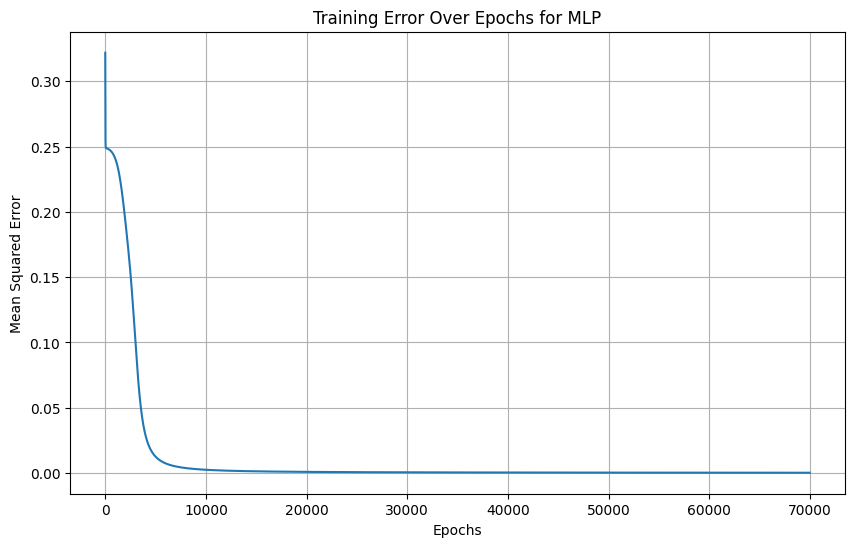

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    """
    다층 퍼셉트론 클래스
    입력층, 은닉층 1개, 출력층으로 구성됩니다.
    """
    def __init__(self, input_size, hidden_size, output_size, lr=0.1, epochs=10000):
        # 가중치와 편향을 무작위로 초기화합니다.
        self.weights_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros(output_size)

        self.lr = lr
        self.epochs = epochs
        self.errors = []

    def _sigmoid(self, x):
        """시그모이드 활성화 함수"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """시그모이드 함수의 미분 (역전파에 사용)"""
        return x * (1 - x)

    def predict(self, x):
        """입력 데이터에 대한 예측을 수행합니다."""
        # 순방향 전파 (Forward Propagation)
        hidden_layer_activation = np.dot(x, self.weights_hidden) + self.bias_hidden
        hidden_layer_output = self._sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
        predicted_output = self._sigmoid(output_layer_activation)
        return predicted_output

    def train(self, X, y):
        """다층 퍼셉트론 모델을 학습시킵니다."""
        for epoch in range(self.epochs):
            # 순방향 전파
            hidden_layer_activation = np.dot(X, self.weights_hidden) + self.bias_hidden
            hidden_layer_output = self._sigmoid(hidden_layer_activation)

            output_layer_activation = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
            predicted_output = self._sigmoid(output_layer_activation)

            # 역방향 전파 (Backpropagation)
            # 1. 출력층의 오차와 델타 계산
            output_error = y - predicted_output
            output_delta = output_error * self._sigmoid_derivative(predicted_output)

            # 2. 은닉층의 오차와 델타 계산
            hidden_error = output_delta.dot(self.weights_output.T)
            hidden_delta = hidden_error * self._sigmoid_derivative(hidden_layer_output)

            # 3. 가중치와 편향 업데이트
            self.weights_output += hidden_layer_output.T.dot(output_delta) * self.lr
            self.bias_output += np.sum(output_delta, axis=0) * self.lr
            self.weights_hidden += X.T.dot(hidden_delta) * self.lr
            self.bias_hidden += np.sum(hidden_delta, axis=0) * self.lr

            # 에포크마다 오차(손실) 기록
            if (epoch + 1) % 500 == 0:
                loss = np.mean(np.square(y - predicted_output))
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss:.4f}")
            self.errors.append(np.mean(np.square(y - predicted_output)))


# XOR 게이트 데이터
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]]) # 출력 형태를 (4, 1)로 변경


# 다층 퍼셉트론 모델 생성 및 훈련
# 입력 노드 2개, 은닉 노드 4개, 출력 노드 1개로 구성
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1, lr=0.1, epochs=70000)
mlp_xor.train(X_xor, y_xor)


# 학습된 모델의 예측 결과 확인
print("\nXOR Gate Test Results:")
for x in X_xor:
   prediction = mlp_xor.predict(x)
   print(f"Input: {x}, Predicted Output: {prediction[0]:.4f}, Rounded: {np.round(prediction[0])}")

# 학습 과정에서의 오차 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(mlp_xor.errors)
plt.title('Training Error Over Epochs for MLP')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

다층 퍼셉트론 모델 학습을 시작합니다...
학습 완료.

--- XOR Gate Test Results ---
Input: [0 0], Target: 0, Predicted: 0.0131, Rounded: 0.0
Input: [0 1], Target: 1, Predicted: 0.9900, Rounded: 1.0
Input: [1 0], Target: 1, Predicted: 0.9899, Rounded: 1.0
Input: [1 1], Target: 0, Predicted: 0.0096, Rounded: 0.0

결정 경계 시각화를 생성합니다...


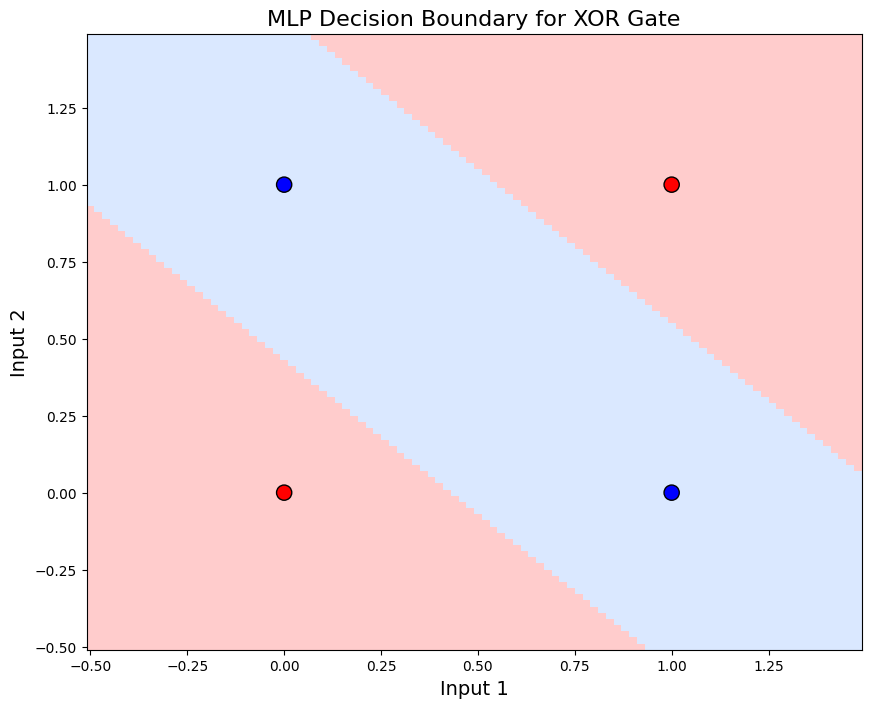

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class MLP:
    """
    다층 퍼셉트론 클래스
    입력층, 은닉층 1개, 출력층으로 구성됩니다.
    """
    def __init__(self, input_size, hidden_size, output_size, lr=0.1, epochs=10000):
        # 가중치와 편향을 무작위로 초기화합니다.
        self.weights_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros(output_size)

        self.lr = lr
        self.epochs = epochs
        self.errors = []

    def _sigmoid(self, x):
        """시그모이드 활성화 함수"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """시그모이드 함수의 미분 (역전파에 사용)"""
        return x * (1 - x)

    def predict(self, x):
        """입력 데이터에 대한 예측을 수행합니다."""
        # 순방향 전파 (Forward Propagation)
        hidden_layer_activation = np.dot(x, self.weights_hidden) + self.bias_hidden
        hidden_layer_output = self._sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
        predicted_output = self._sigmoid(output_layer_activation)
        return predicted_output

    def train(self, X, y):
        """다층 퍼셉트론 모델을 학습시킵니다."""
        for epoch in range(self.epochs):
            # 순방향 전파
            hidden_layer_activation = np.dot(X, self.weights_hidden) + self.bias_hidden
            hidden_layer_output = self._sigmoid(hidden_layer_activation)

            output_layer_activation = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
            predicted_output = self._sigmoid(output_layer_activation)

            # 역방향 전파 (Backpropagation)
            output_error = y - predicted_output
            output_delta = output_error * self._sigmoid_derivative(predicted_output)
            hidden_error = output_delta.dot(self.weights_output.T)
            hidden_delta = hidden_error * self._sigmoid_derivative(hidden_layer_output)
            self.weights_output += hidden_layer_output.T.dot(output_delta) * self.lr
            self.bias_output += np.sum(output_delta, axis=0) * self.lr
            self.weights_hidden += X.T.dot(hidden_delta) * self.lr
            self.bias_hidden += np.sum(hidden_delta, axis=0) * self.lr

            # 오차 기록
            self.errors.append(np.mean(np.square(y - predicted_output)))

# --- 결정 경계 시각화 함수 ---
def plot_decision_boundary(X, y, model):
    """모델의 결정 경계를 시각화하는 함수"""
    cmap_light = ListedColormap(['#FFCCCC', '#DAE8FF']) # 배경 색상 (Red/Blue 계열)
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # 데이터 포인트 색상

    h = .02 # mesh grid 간격
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 그리드의 모든 점에 대해 예측 수행
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # 예측 결과(0~1 사이의 확률값)를 0 또는 1로 변환
    Z = np.round(Z)
    Z = Z.reshape(xx.shape)

    # 결정 경계와 데이터 포인트 플로팅
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold, edgecolor='k', s=120, marker='o')
    plt.xlabel('Input 1', fontsize=14)
    plt.ylabel('Input 2', fontsize=14)
    plt.title('MLP Decision Boundary for XOR Gate', fontsize=16)
    plt.show()


# --- 메인 실행 코드 ---

# 1. XOR 게이트 데이터 준비
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]]) # 학습용 (2D)

# 2. 다층 퍼셉트론 모델 생성 및 훈련
# 입력 노드 2개, 은닉 노드 4개, 출력 노드 1개로 구성
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1, lr=1, epochs=10000)
print("다층 퍼셉트론 모델 학습을 시작합니다...")
mlp_xor.train(X_xor, y_xor)
print("학습 완료.")


# 3. 학습된 모델의 예측 결과 확인
print("\n--- XOR Gate Test Results ---")
for i, x_input in enumerate(X_xor):
   prediction = mlp_xor.predict(x_input)
   print(f"Input: {x_input}, Target: {y_xor[i][0]}, Predicted: {prediction[0]:.4f}, Rounded: {np.round(prediction[0])}")

# 4. 결정 경계 시각화
print("\n결정 경계 시각화를 생성합니다...")
plot_decision_boundary(X_xor, y_xor, mlp_xor)

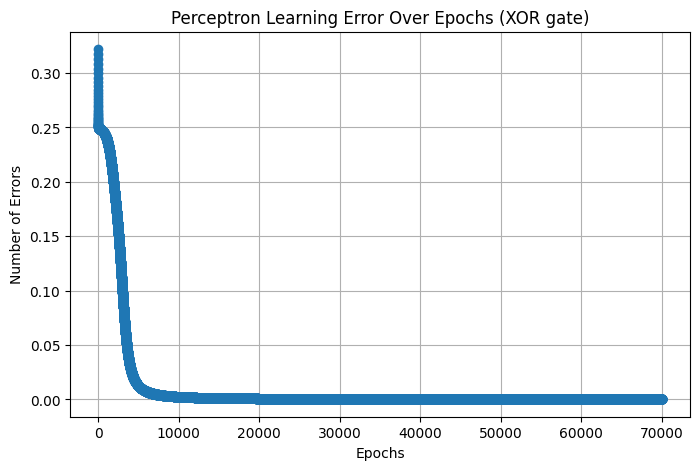

In [ ]:
#오류 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(mlp_xor.errors) + 1), mlp_xor.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Error Over Epochs (XOR gate)')
plt.grid(True)
plt.show()
